In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Combining Datasets

In [2]:
directory_path = '/kaggle/input/cic-ids-2018-version-1'
selected_files = ['fri_nan_inf_dup.csv', 'thur2_nan_inf_dup.csv', 'wed1_nan_inf_dup.csv']

dataframes = []

for file in selected_files:
    file_path = os.path.join(directory_path, file)
    df_temp = pd.read_csv(file_path)
    dataframes.append(df_temp)

df = pd.concat(dataframes, ignore_index=True)

# Removing Unnecessary Information

In [3]:
# removing data specific columns
df.drop(['Timestamp'],axis = 1,inplace=True)
df.drop(['Dst Port'],axis = 1,inplace=True)

In [4]:
df.head()

Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0         6        1532698            11            11             1179   
1        17      117573855             3             0             1500   
2        17      117573848             3             0             1500   
3         6        1745392            11            11             1179   
4        17       89483474             6             0             3000   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0             1969              648                0        107.181818   
1                0              500              500        500.000000   
2                0              500              500        500.000000   
3             1969              648                0        107.181818   
4                0              500              500        500.000000   

   Fwd Pkt Len Std  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0       196.245162  ...                32          0.0         0.0   
1         0.000000  ...                 8          0.0         0.0   
2         0.000000  ...                 8          0.0         0.0   
3       196.245162  ...                32          0.0         0.0   
4         0.000000  ...                 8    4000364.0         0.0   

   Active Max  Active Min   Idle Mean      Idle Std  Idle Max  Idle Min  \
0           0           0         0.0  0.000000e+00         0         0   
1           0           0  58786927.5  2.375324e+07  75583006  41990849   
2           0           0  58786924.0  2.375325e+07  75583007  41990841   
3           0           0         0.0  0.000000e+00         0         0   
4     4000364     4000364  21370777.5  1.528092e+07  41989576   7200485   

    Label  
0  Benign  
1  Benign  
2  Benign  
3  Benign  
4  Benign  

[5 rows x 78 columns]

In [5]:
#check variance of columns - and remove columns with no variance
variances = df.var(numeric_only=None)
print(variances.to_string())

Protocol             2.537684e+01
Flow Duration        1.362392e+18
Tot Fwd Pkts         7.838839e+03
Tot Bwd Pkts         5.441912e+04
TotLen Fwd Pkts      1.001525e+08
TotLen Bwd Pkts      1.099922e+11
Fwd Pkt Len Max      8.048457e+04
Fwd Pkt Len Min      7.204087e+02
Fwd Pkt Len Mean     3.057662e+03
Fwd Pkt Len Std      7.984926e+03
Bwd Pkt Len Max      2.699276e+05
Bwd Pkt Len Min      2.818392e+03
Bwd Pkt Len Mean     3.225906e+04
Bwd Pkt Len Std      4.171245e+04
Flow Byts/s          1.590129e+13
Flow Pkts/s          5.140695e+10
Flow IAT Mean        2.777334e+17
Flow IAT Std         6.400570e+17
Flow IAT Max         2.434338e+18
Flow IAT Min         3.129117e+18
Fwd IAT Tot          1.362387e+18
Fwd IAT Mean         2.777337e+17
Fwd IAT Std          6.400602e+17
Fwd IAT Max          2.434336e+18
Fwd IAT Min          3.129119e+18
Bwd IAT Tot          7.006477e+14
Bwd IAT Mean         7.372290e+12
Bwd IAT Std          9.490061e+12
Bwd IAT Max          8.817883e+13
Bwd IAT Min   

/tmp/ipykernel_32/3561089695.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = df.var(numeric_only=None)


In [6]:
#check variance of columns - and remove columns with no variance
variances = df.var(numeric_only=None)
zero_variances = variances[variances == 0]
print(zero_variances.to_string())

Bwd PSH Flags       0.0
Fwd URG Flags       0.0
Bwd URG Flags       0.0
CWE Flag Count      0.0
Fwd Byts/b Avg      0.0
Fwd Pkts/b Avg      0.0
Fwd Blk Rate Avg    0.0
Bwd Byts/b Avg      0.0
Bwd Pkts/b Avg      0.0
Bwd Blk Rate Avg    0.0


/tmp/ipykernel_32/3627628697.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = df.var(numeric_only=None)


In [7]:
#remove cols with 0 variance
df.drop(['Bwd PSH Flags'], axis = 1,inplace=True)
df.drop(['Bwd URG Flags'], axis = 1,inplace=True)
df.drop(['Fwd Byts/b Avg'], axis = 1,inplace=True)
df.drop(['Fwd Pkts/b Avg'], axis = 1,inplace=True)
df.drop(['Fwd Blk Rate Avg'], axis = 1,inplace=True)
df.drop(['Bwd Byts/b Avg'], axis = 1,inplace=True)
df.drop(['Bwd Pkts/b Avg'], axis = 1,inplace=True)
df.drop(['Bwd Blk Rate Avg'], axis = 1,inplace=True)

In [8]:
#check variance of columns - and remove columns with no variance
variances = df.var(numeric_only=None)
zero_variances = variances[variances < 1]
print(zero_variances.to_string())

Fwd PSH Flags     0.034516
Fwd URG Flags     0.000000
FIN Flag Cnt      0.004601
SYN Flag Cnt      0.034516
RST Flag Cnt      0.089324
PSH Flag Cnt      0.241842
ACK Flag Cnt      0.207857
URG Flag Cnt      0.047611
CWE Flag Count    0.000000
ECE Flag Cnt      0.089323
Down/Up Ratio     0.454009


/tmp/ipykernel_32/1532275238.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = df.var(numeric_only=None)


# Data Info

In [9]:
df.head()

Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0         6        1532698            11            11             1179   
1        17      117573855             3             0             1500   
2        17      117573848             3             0             1500   
3         6        1745392            11            11             1179   
4        17       89483474             6             0             3000   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0             1969              648                0        107.181818   
1                0              500              500        500.000000   
2                0              500              500        500.000000   
3             1969              648                0        107.181818   
4                0              500              500        500.000000   

   Fwd Pkt Len Std  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0       196.245162  ...                32          0.0         0.0   
1         0.000000  ...                 8          0.0         0.0   
2         0.000000  ...                 8          0.0         0.0   
3       196.245162  ...                32          0.0         0.0   
4         0.000000  ...                 8    4000364.0         0.0   

   Active Max  Active Min   Idle Mean      Idle Std  Idle Max  Idle Min  \
0           0           0         0.0  0.000000e+00         0         0   
1           0           0  58786927.5  2.375324e+07  75583006  41990849   
2           0           0  58786924.0  2.375325e+07  75583007  41990841   
3           0           0         0.0  0.000000e+00         0         0   
4     4000364     4000364  21370777.5  1.528092e+07  41989576   7200485   

    Label  
0  Benign  
1  Benign  
2  Benign  
3  Benign  
4  Benign  

[5 rows x 70 columns]

In [10]:
df.shape #number of rows and columns

(2899078, 70)

In [11]:
print ('Number of rows (Samples): ' , df.shape[0])
print ('Number of columns (Features): ' , df.shape[1])

Number of rows (Samples):  2899078
Number of columns (Features):  70


In [12]:
print(df['Label'].value_counts())

Benign              2741482
SSH-Bruteforce       117322
FTP-BruteForce        39346
Brute Force -Web        611
Brute Force -XSS        230
SQL Injection            87
Name: Label, dtype: int64


In [13]:
df.info() #columns and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899078 entries, 0 to 2899077
Data columns (total 70 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Protocol           int64  
 1   Flow Duration      int64  
 2   Tot Fwd Pkts       int64  
 3   Tot Bwd Pkts       int64  
 4   TotLen Fwd Pkts    int64  
 5   TotLen Bwd Pkts    int64  
 6   Fwd Pkt Len Max    int64  
 7   Fwd Pkt Len Min    int64  
 8   Fwd Pkt Len Mean   float64
 9   Fwd Pkt Len Std    float64
 10  Bwd Pkt Len Max    int64  
 11  Bwd Pkt Len Min    int64  
 12  Bwd Pkt Len Mean   float64
 13  Bwd Pkt Len Std    float64
 14  Flow Byts/s        float64
 15  Flow Pkts/s        float64
 16  Flow IAT Mean      float64
 17  Flow IAT Std       float64
 18  Flow IAT Max       int64  
 19  Flow IAT Min       int64  
 20  Fwd IAT Tot        int64  
 21  Fwd IAT Mean       float64
 22  Fwd IAT Std        float64
 23  Fwd IAT Max        int64  
 24  Fwd IAT Min        int64  
 25  Bwd IAT Tot       

In [14]:
df.describe() #basic statistical computations

Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
count  2.899078e+06   2.899078e+06  2.899078e+06  2.899078e+06   
mean   8.965170e+00   1.443801e+07  6.977142e+00  9.096266e+00   
std    5.037543e+00   1.167216e+09  8.853722e+01  2.332791e+02   
min    0.000000e+00  -9.190110e+11  1.000000e+00  0.000000e+00   
25%    6.000000e+00   4.500000e+02  1.000000e+00  1.000000e+00   
50%    6.000000e+00   8.343100e+04  2.000000e+00  1.000000e+00   
75%    1.700000e+01   4.151030e+06  8.000000e+00  7.000000e+00   
max    1.700000e+01   1.200000e+08  5.809100e+04  1.231180e+05   

       TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
count     2.899078e+06     2.899078e+06     2.899078e+06     2.899078e+06   
mean      4.559560e+02     7.820063e+03     1.933125e+02     1.216158e+01   
std       1.000762e+04     3.316507e+05     2.836980e+02     2.684043e+01   
min       0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
25%       0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00   
50%       4.700000e+01     1.110000e+02     4.200000e+01     0.000000e+00   
75%       5.850000e+02     1.581000e+03     2.500000e+02     3.100000e+01   
max       8.591554e+06     1.563604e+08     6.444000e+04     1.460000e+03   

       Fwd Pkt Len Mean  Fwd Pkt Len Std  ...  Fwd Act Data Pkts  \
count      2.899078e+06     2.899078e+06  ...       2.899078e+06   
mean       4.681378e+01     5.825000e+01  ...       2.606265e+00   
std        5.529613e+01     8.935841e+01  ...       5.235279e+00   
min        0.000000e+00     0.000000e+00  ...       0.000000e+00   
25%        0.000000e+00     0.000000e+00  ...       0.000000e+00   
50%        3.700000e+01     0.000000e+00  ...       0.000000e+00   
75%        6.366667e+01     9.295339e+01  ...       4.000000e+00   
max        1.121703e+04     1.576084e+04  ...       2.754000e+03   

       Fwd Seg Size Min   Active Mean    Active Std    Active Max  \
count      2.899078e+06  2.899078e+06  2.899078e+06  2.899078e+06   
mean       1.716960e+01  6.763400e+04  3.256464e+04  1.211300e+05   
std        7.072386e+00  7.247189e+05  3.682942e+05  1.013586e+06   
min        0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%        8.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%        2.000000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%        2.000000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
max        4.800000e+01  1.131706e+08  6.950474e+07  1.131706e+08   

         Active Min     Idle Mean      Idle Std      Idle Max      Idle Min  
count  2.899078e+06  2.899078e+06  2.899078e+06  2.899078e+06  2.899078e+06  
mean   4.894553e+04  8.843894e+06  8.867107e+05  1.052786e+07  7.655059e+06  
std    6.558698e+05  6.223352e+08  4.003333e+08  1.479476e+09  1.475666e+08  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
max    1.131706e+08  3.955714e+11  2.622479e+11  9.797810e+11  2.399340e+11  

[8 rows x 69 columns]

In [15]:
#checking for null values
df_null_values = df.isnull().sum()
print(df_null_values.to_string())

Protocol             0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Fwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
FIN Flag Cnt         0
SYN Flag Cnt         0
RST Flag Cn

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899078 entries, 0 to 2899077
Data columns (total 70 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Protocol           int64  
 1   Flow Duration      int64  
 2   Tot Fwd Pkts       int64  
 3   Tot Bwd Pkts       int64  
 4   TotLen Fwd Pkts    int64  
 5   TotLen Bwd Pkts    int64  
 6   Fwd Pkt Len Max    int64  
 7   Fwd Pkt Len Min    int64  
 8   Fwd Pkt Len Mean   float64
 9   Fwd Pkt Len Std    float64
 10  Bwd Pkt Len Max    int64  
 11  Bwd Pkt Len Min    int64  
 12  Bwd Pkt Len Mean   float64
 13  Bwd Pkt Len Std    float64
 14  Flow Byts/s        float64
 15  Flow Pkts/s        float64
 16  Flow IAT Mean      float64
 17  Flow IAT Std       float64
 18  Flow IAT Max       int64  
 19  Flow IAT Min       int64  
 20  Fwd IAT Tot        int64  
 21  Fwd IAT Mean       float64
 22  Fwd IAT Std        float64
 23  Fwd IAT Max        int64  
 24  Fwd IAT Min        int64  
 25  Bwd IAT Tot       

In [17]:
df_data = df.iloc[:, 0:66]
df_inf_count = np.isinf(df_data.iloc[1:]).sum().sum()
print("Count of Infinite Values:", df_inf_count)

Count of Infinite Values: 0


In [18]:
df_inf_values = np.isinf(df_data.iloc[1:]).sum()
print("Infinite values count list:", df_inf_values.to_string())

Infinite values count list: Protocol             0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Fwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
FIN Flag Cnt         0
SYN Fl

In [19]:
#duplicates
print("Duplicate values:")
df.duplicated()

Duplicate values:


0          False
1          False
2          False
3          False
4          False
           ...  
2899073    False
2899074     True
2899075    False
2899076    False
2899077    False
Length: 2899078, dtype: bool

In [20]:
print("Count of duplicate values:")
df.duplicated().sum()

Count of duplicate values:


750109

In [21]:
print("Duplicate values before (all occurences):")
df.loc[df.duplicated(keep=False), :]

Duplicate values before (all occurences):


Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
318            17            655             1             1              300   
363             6             13             2             0                0   
378             6            105             2             0                0   
385             6             24             2             0                0   
391             6             13             2             0                0   
...           ...            ...           ...           ...              ...   
2899062         6            125             2             0                0   
2899068         6             62             2             0                0   
2899070         6            135             2             0                0   
2899072         6             81             2             0                0   
2899074         6            117             2             0                0   

         TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
318                  329              300              300             300.0   
363                    0                0                0               0.0   
378                    0                0                0               0.0   
385                    0                0                0               0.0   
391                    0                0                0               0.0   
...                  ...              ...              ...               ...   
2899062                0                0                0               0.0   
2899068                0                0                0               0.0   
2899070                0                0                0               0.0   
2899072                0                0                0               0.0   
2899074                0                0                0               0.0   

         Fwd Pkt Len Std  ...  Fwd Seg Size Min  Active Mean  Active Std  \
318                  0.0  ...                 8          0.0         0.0   
363                  0.0  ...                20          0.0         0.0   
378                  0.0  ...                20          0.0         0.0   
385                  0.0  ...                20          0.0         0.0   
391                  0.0  ...                20          0.0         0.0   
...                  ...  ...               ...          ...         ...   
2899062              0.0  ...                20          0.0         0.0   
2899068              0.0  ...                20          0.0         0.0   
2899070              0.0  ...                20          0.0         0.0   
2899072              0.0  ...                20          0.0         0.0   
2899074              0.0  ...                20          0.0         0.0   

         Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  \
318               0           0        0.0       0.0         0         0   
363               0           0        0.0       0.0         0         0   
378               0           0        0.0       0.0         0         0   
385               0           0        0.0       0.0         0         0   
391               0           0        0.0       0.0         0         0   
...             ...         ...        ...       ...       ...       ...   
2899062           0           0        0.0       0.0         0         0   
2899068           0           0        0.0       0.0         0         0   
2899070           0           0        0.0       0.0         0         0   
2899072           0           0        0.0       0.0         0         0   
2899074           0           0        0.0       0.0         0         0   

                    Label  
318                Benign  
363      Brute Force -Web  
378      Brute Force -Web  
385      Brute Force -Web  
391      Brute Force -Web  
...                   ...  
2899062            Benign  
2899068            Benign

In [22]:
print("Duplicate values before (first occurences):")
df.loc[df.duplicated(keep='first'), :] #keeping only the first occurence of the duplicate

Duplicate values before (first occurences):


Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
391             6             13             2             0                0   
448             6            114             2             0                0   
455             6            128             2             0                0   
461             6             13             2             0                0   
470             6             13             2             0                0   
...           ...            ...           ...           ...              ...   
2899062         6            125             2             0                0   
2899068         6             62             2             0                0   
2899070         6            135             2             0                0   
2899072         6             81             2             0                0   
2899074         6            117             2             0                0   

         TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
391                    0                0                0               0.0   
448                    0                0                0               0.0   
455                    0                0                0               0.0   
461                    0                0                0               0.0   
470                    0                0                0               0.0   
...                  ...              ...              ...               ...   
2899062                0                0                0               0.0   
2899068                0                0                0               0.0   
2899070                0                0                0               0.0   
2899072                0                0                0               0.0   
2899074                0                0                0               0.0   

         Fwd Pkt Len Std  ...  Fwd Seg Size Min  Active Mean  Active Std  \
391                  0.0  ...                20          0.0         0.0   
448                  0.0  ...                20          0.0         0.0   
455                  0.0  ...                20          0.0         0.0   
461                  0.0  ...                20          0.0         0.0   
470                  0.0  ...                20          0.0         0.0   
...                  ...  ...               ...          ...         ...   
2899062              0.0  ...                20          0.0         0.0   
2899068              0.0  ...                20          0.0         0.0   
2899070              0.0  ...                20          0.0         0.0   
2899072              0.0  ...                20          0.0         0.0   
2899074              0.0  ...                20          0.0         0.0   

         Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  \
391               0           0        0.0       0.0         0         0   
448               0           0        0.0       0.0         0         0   
455               0           0        0.0       0.0         0         0   
461               0           0        0.0       0.0         0         0   
470               0           0        0.0       0.0         0         0   
...             ...         ...        ...       ...       ...       ...   
2899062           0           0        0.0       0.0         0         0   
2899068           0           0        0.0       0.0         0         0   
2899070           0           0        0.0       0.0         0         0   
2899072           0           0        0.0       0.0         0         0   
2899074           0           0        0.0       0.0         0         0   

                    Label  
391      Brute Force -Web  
448      Brute Force -Web  
455      Brute Force -Web  
461      Brute Force -Web  
470      Brute Force -Web  
...                   ...  
2899062            Benign  
2899068            Benign

In [23]:
# Use keep='first' to keep the first occurrence 
df.drop_duplicates(keep='first',inplace = True)

In [24]:
print("Count of duplicate values after:")
df.duplicated().sum()

Count of duplicate values after:


0

In [25]:
print("Duplicate values after (all occurences):")
df.loc[df.duplicated(keep=False), :]

Duplicate values after (all occurences):


Empty DataFrame
Columns: [Protocol, Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, TotLen Fwd Pkts, TotLen Bwd Pkts, Fwd Pkt Len Max, Fwd Pkt Len Min, Fwd Pkt Len Mean, Fwd Pkt Len Std, Bwd Pkt Len Max, Bwd Pkt Len Min, Bwd Pkt Len Mean, Bwd Pkt Len Std, Flow Byts/s, Flow Pkts/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Tot, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Tot, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd PSH Flags, Fwd URG Flags, Fwd Header Len, Bwd Header Len, Fwd Pkts/s, Bwd Pkts/s, Pkt Len Min, Pkt Len Max, Pkt Len Mean, Pkt Len Std, Pkt Len Var, FIN Flag Cnt, SYN Flag Cnt, RST Flag Cnt, PSH Flag Cnt, ACK Flag Cnt, URG Flag Cnt, CWE Flag Count, ECE Flag Cnt, Down/Up Ratio, Pkt Size Avg, Fwd Seg Size Avg, Bwd Seg Size Avg, Subflow Fwd Pkts, Subflow Fwd Byts, Subflow Bwd Pkts, Subflow Bwd Byts, Init Fwd Win Byts, Init Bwd Win Byts, Fwd Act Data Pkts, Fwd Seg Size Min, Active Mean, Active Std, Active Max, Active Min, Idle Mean, Idle Std, Idle Max, Idle Min, Label]
Index: []

[0 rows x 70 columns]

In [26]:
df['Label'].value_counts()

Benign              2054001
SSH-Bruteforce        94048
Brute Force -Web        555
Brute Force -XSS        228
SQL Injection            84
FTP-BruteForce           53
Name: Label, dtype: int64

# Negative Values

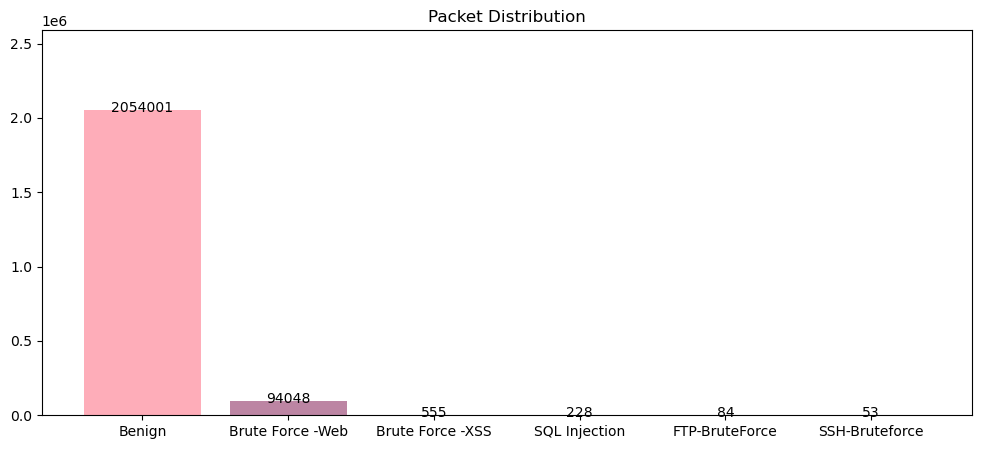

In [27]:
plt.figure(figsize=(12, 5))
plt.title('Packet Distribution')
colors = ['#feadb9','#bc85a3','#9799ba']
bars = plt.bar(x=df['Label'].unique(), height=df['Label'].value_counts(), color=colors)
plt.ylim([0, 2589517])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 15000, str(int(bar.get_height())), va='center', ha='center')
p = plt.gcf()

In [28]:
exclude_columns = ['Label']
for column in df.columns:
    if column not in exclude_columns:
        num_negatives = (df[column] < 0).sum()
        print(f"Total negative values in '{column}': {num_negatives}")

Total negative values in 'Protocol': 0
Total negative values in 'Flow Duration': 14
Total negative values in 'Tot Fwd Pkts': 0
Total negative values in 'Tot Bwd Pkts': 0
Total negative values in 'TotLen Fwd Pkts': 0
Total negative values in 'TotLen Bwd Pkts': 0
Total negative values in 'Fwd Pkt Len Max': 0
Total negative values in 'Fwd Pkt Len Min': 0
Total negative values in 'Fwd Pkt Len Mean': 0
Total negative values in 'Fwd Pkt Len Std': 0
Total negative values in 'Bwd Pkt Len Max': 0
Total negative values in 'Bwd Pkt Len Min': 0
Total negative values in 'Bwd Pkt Len Mean': 0
Total negative values in 'Bwd Pkt Len Std': 0
Total negative values in 'Flow Byts/s': 0
Total negative values in 'Flow Pkts/s': 14
Total negative values in 'Flow IAT Mean': 14
Total negative values in 'Flow IAT Std': 0
Total negative values in 'Flow IAT Max': 3
Total negative values in 'Flow IAT Min': 15
Total negative values in 'Fwd IAT Tot': 14
Total negative values in 'Fwd IAT Mean': 14
Total negative values

In [29]:
negative_values = df[df['Flow Duration'] < 0]['Flow Duration'].unique()
sorted_negative_values = sorted(negative_values)
negative_values_string = '\n'.join(str(value) for value in sorted_negative_values)
print("Unique negative values in 'Flow Duration':")
print(negative_values_string)

negative_values = df[df['Flow IAT Mean'] < 0]['Flow IAT Mean'].unique()
sorted_negative_values = sorted(negative_values)
negative_values_string = '\n'.join(str(value) for value in sorted_negative_values)
print("Unique negative values in 'Flow IAT Mean':")
print(negative_values_string)

negative_values = df[df['Flow IAT Max'] < 0]['Flow IAT Max'].unique()
sorted_negative_values = sorted(negative_values)
negative_values_string = '\n'.join(str(value) for value in sorted_negative_values)
print("Unique negative values in 'Flow IAT Max':")
print(negative_values_string)
print('\n')

negative_values = df[df['Flow IAT Min'] < 0]['Flow IAT Min'].unique()
sorted_negative_values = sorted(negative_values)
negative_values_string = '\n'.join(str(value) for value in sorted_negative_values)
print("Unique negative values in 'Flow IAT Min':")
print(negative_values_string)
print('\n')

negative_values = df[df['Fwd IAT Tot'] < 0]['Fwd IAT Tot'].unique()
sorted_negative_values = sorted(negative_values)
negative_values_string = '\n'.join(str(value) for value in sorted_negative_values)
print("Unique negative values in 'Fwd IAT Tot':")
print(negative_values_string)
print('\n')

negative_values = df[df['Fwd IAT Mean'] < 0]['Fwd IAT Mean'].unique()
sorted_negative_values = sorted(negative_values)
negative_values_string = '\n'.join(str(value) for value in sorted_negative_values)
print("Unique negative values in 'Fwd IAT Mean':")
print(negative_values_string)
print('\n')

negative_values = df[df['Fwd IAT Max'] < 0]['Fwd IAT Max'].unique()
sorted_negative_values = sorted(negative_values)
negative_values_string = '\n'.join(str(value) for value in sorted_negative_values)
print("Unique negative values in 'Fwd IAT Max':")
print(negative_values_string)
print('\n')

negative_values = df[df['Fwd IAT Min'] < 0]['Fwd IAT Min'].unique()
sorted_negative_values = sorted(negative_values)
negative_values_string = '\n'.join(str(value) for value in sorted_negative_values)
print("Unique negative values in 'Fwd IAT Min':")
print(negative_values_string)


Unique negative values in 'Flow Duration':
-919011000000
-828220000000
-699056000000
-681402000000
-642052000000
-578768000000
-553312000000
-529801000000
-273850000000
-188505000000
-110116000000
-74877000000
-11873000000
-4834000000
Unique negative values in 'Flow IAT Mean':
-828220000000.0
-340701000000.0
-23563125000.0
-18893405405.4054
-16767030303.0303
-12314212765.9575
-11873000000.0
-11487637500.0
-10696714285.7143
-3963283950.61729
-1411743589.74359
-1051192460.31746
-974555160.142345
-115095238.09524
Unique negative values in 'Flow IAT Max':
-828220000000
-159438000000
-11873000000


Unique negative values in 'Flow IAT Min':
-947405000000
-943564000000
-940829000000
-936885000000
-935931000000
-917310000000
-881562000000
-880263000000
-839505000000
-828220000000
-619903000000
-521964000000
-449709000000
-11873000000
-2228


Unique negative values in 'Fwd IAT Tot':
-919011000000
-828220000000
-699056000000
-681402000000
-642052000000
-578768000000
-553312000000
-529801000000
-

In [30]:
negative_values_index = df[df['Flow Duration'] < 0].index
df = df.drop(negative_values_index)
print("DataFrame after removing rows with negative values:")
print(df)

DataFrame after removing rows with negative values:
         Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0               6        1532698            11            11             1179   
1              17      117573855             3             0             1500   
2              17      117573848             3             0             1500   
3               6        1745392            11            11             1179   
4              17       89483474             6             0             3000   
...           ...            ...           ...           ...              ...   
2899071         6       10056041             5             5             1136   
2899073         6       10156986             5             5             1089   
2899075         6        5095331             3             1                0   
2899076         6        5235511             3             1                0   
2899077         6        5807256             6           

In [31]:
exclude_columns = ['Label']
for column in df.columns:
    if column not in exclude_columns:
        num_negatives = (df[column] < 0).sum()
        print(f"Total negative values in '{column}': {num_negatives}")

Total negative values in 'Protocol': 0
Total negative values in 'Flow Duration': 0
Total negative values in 'Tot Fwd Pkts': 0
Total negative values in 'Tot Bwd Pkts': 0
Total negative values in 'TotLen Fwd Pkts': 0
Total negative values in 'TotLen Bwd Pkts': 0
Total negative values in 'Fwd Pkt Len Max': 0
Total negative values in 'Fwd Pkt Len Min': 0
Total negative values in 'Fwd Pkt Len Mean': 0
Total negative values in 'Fwd Pkt Len Std': 0
Total negative values in 'Bwd Pkt Len Max': 0
Total negative values in 'Bwd Pkt Len Min': 0
Total negative values in 'Bwd Pkt Len Mean': 0
Total negative values in 'Bwd Pkt Len Std': 0
Total negative values in 'Flow Byts/s': 0
Total negative values in 'Flow Pkts/s': 0
Total negative values in 'Flow IAT Mean': 0
Total negative values in 'Flow IAT Std': 0
Total negative values in 'Flow IAT Max': 0
Total negative values in 'Flow IAT Min': 1
Total negative values in 'Fwd IAT Tot': 0
Total negative values in 'Fwd IAT Mean': 0
Total negative values in 'F

In [32]:
negative_values_index = df[df['Flow IAT Min'] < 0].index
df = df.drop(negative_values_index)

negative_values_index = df[df['Fwd IAT Min'] < 0].index
df = df.drop(negative_values_index)

In [33]:
exclude_columns = ['Label']
for column in df.columns:
    if column not in exclude_columns:
        num_negatives = (df[column] < 0).sum()
        print(f"Total negative values in '{column}': {num_negatives}")

Total negative values in 'Protocol': 0
Total negative values in 'Flow Duration': 0
Total negative values in 'Tot Fwd Pkts': 0
Total negative values in 'Tot Bwd Pkts': 0
Total negative values in 'TotLen Fwd Pkts': 0
Total negative values in 'TotLen Bwd Pkts': 0
Total negative values in 'Fwd Pkt Len Max': 0
Total negative values in 'Fwd Pkt Len Min': 0
Total negative values in 'Fwd Pkt Len Mean': 0
Total negative values in 'Fwd Pkt Len Std': 0
Total negative values in 'Bwd Pkt Len Max': 0
Total negative values in 'Bwd Pkt Len Min': 0
Total negative values in 'Bwd Pkt Len Mean': 0
Total negative values in 'Bwd Pkt Len Std': 0
Total negative values in 'Flow Byts/s': 0
Total negative values in 'Flow Pkts/s': 0
Total negative values in 'Flow IAT Mean': 0
Total negative values in 'Flow IAT Std': 0
Total negative values in 'Flow IAT Max': 0
Total negative values in 'Flow IAT Min': 0
Total negative values in 'Fwd IAT Tot': 0
Total negative values in 'Fwd IAT Mean': 0
Total negative values in 'F

In [35]:
columns_to_check = ['Flow Pkts/s', 'Flow IAT Mean','Flow IAT Max', 'Flow IAT Min','Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min','Flow Duration']
negative_values_info = []
for column in columns_to_check:
    negative_values = df[df[column] < 0][column].tolist()
    if negative_values:
        negative_values_info.append((column, negative_values))
result_string = "\n".join(f"Column '{column}': {values}" for column, values in negative_values_info)
print("Negative values in the specified columns:")
print(result_string)

Negative values in the specified columns:



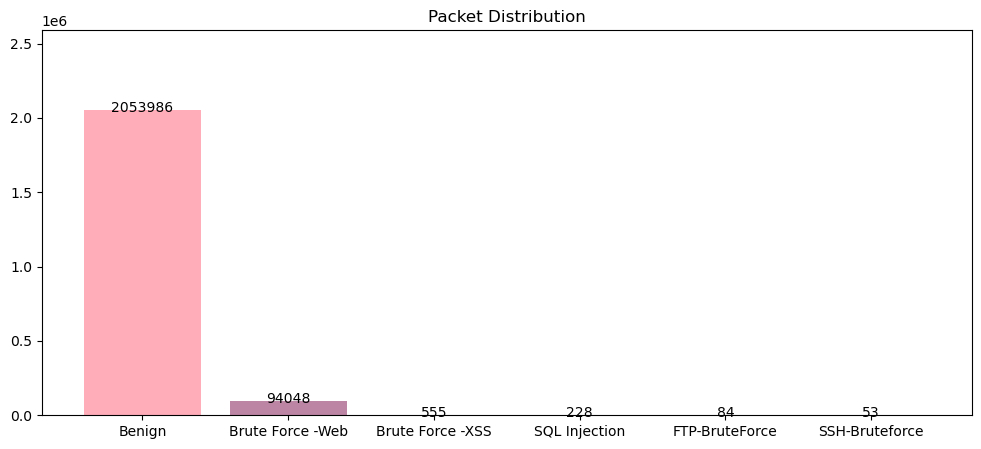

In [38]:
plt.figure(figsize=(12, 5))
plt.title('Packet Distribution')
colors = ['#feadb9','#bc85a3','#9799ba']
bars = plt.bar(x=df['Label'].unique(), height=df['Label'].value_counts(), color=colors)
plt.ylim([0, 2589517])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 15000, str(int(bar.get_height())), va='center', ha='center')
p = plt.gcf()

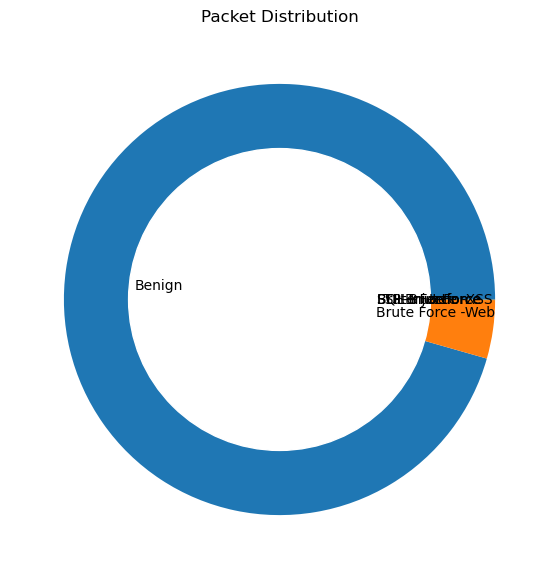

In [40]:
#pie chart for label column
plt.figure(figsize=(7,7))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Packet Distribution')
plt.pie(df['Label'].value_counts(), labels=df['Label'].unique(),labeldistance=0.45)
p = plt.gcf()
p.gca().add_artist(circle)

# Train - Test Split

In [64]:
X = df.drop('Label', axis = 1)
Y = df[['Label']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [65]:
Y_train.value_counts()

Label           
Benign              1643189
SSH-Bruteforce        75238
Brute Force -Web        444
Brute Force -XSS        182
SQL Injection            67
FTP-BruteForce           43
dtype: int64

In [66]:
Y_test.value_counts()

Label           
Benign              410797
SSH-Bruteforce       18810
Brute Force -Web       111
Brute Force -XSS        46
SQL Injection           17
FTP-BruteForce          10
dtype: int64

In [67]:
X_train.shape

(1719163, 69)

In [68]:
X_test.shape

(429791, 69)

In [69]:
Y_train.shape

(1719163, 1)

In [70]:
Y_test.shape

(429791, 1)

In [71]:
X_train.to_csv('X_train.csv', index=False) # Save the updated dataset to a new file
X_test.to_csv('X_test.csv', index=False) # Save the updated dataset to a new file
Y_train.to_csv('Y_train.csv', index=False) # Save the updated dataset to a new file
Y_test.to_csv('Y_test.csv', index=False) # Save the updated dataset to a new file

# Correlation

In [49]:
X_train.head() #69 columns

Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
2411691         6           1002             3             0               77   
1154313         6        5931046             4             4               97   
630340          6       86103821             2             0                0   
873768          6        1222081             7             5              364   
1807998         6       86238618             2             0                0   

         TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
2411691                0               46                0         25.666667   
1154313              231               97                0         24.250000   
630340                 0                0                0          0.000000   
873768               582              103                0         52.000000   
1807998                0                0                0          0.000000   

         Fwd Pkt Len Std  ...  Fwd Act Data Pkts  Fwd Seg Size Min  \
2411691        23.459184  ...                  1                20   
1154313        48.500000  ...                  1                20   
630340          0.000000  ...                  0                20   
873768         49.217206  ...                  4                20   
1807998         0.000000  ...                  0                20   

         Active Mean  Active Std  Active Max  Active Min   Idle Mean  \
2411691          0.0         0.0           0           0         0.0   
1154313          0.0         0.0           0           0         0.0   
630340           0.0         0.0           0           0  86103821.0   
873768           0.0         0.0           0           0         0.0   
1807998          0.0         0.0           0           0  86238618.0   

         Idle Std  Idle Max  Idle Min  
2411691       0.0         0         0  
1154313       0.0         0         0  
630340        0.0  86103821  86103821  
873768        0.0         0         0  
1807998       0.0  86238618  86238618  

[5 rows x 69 columns]

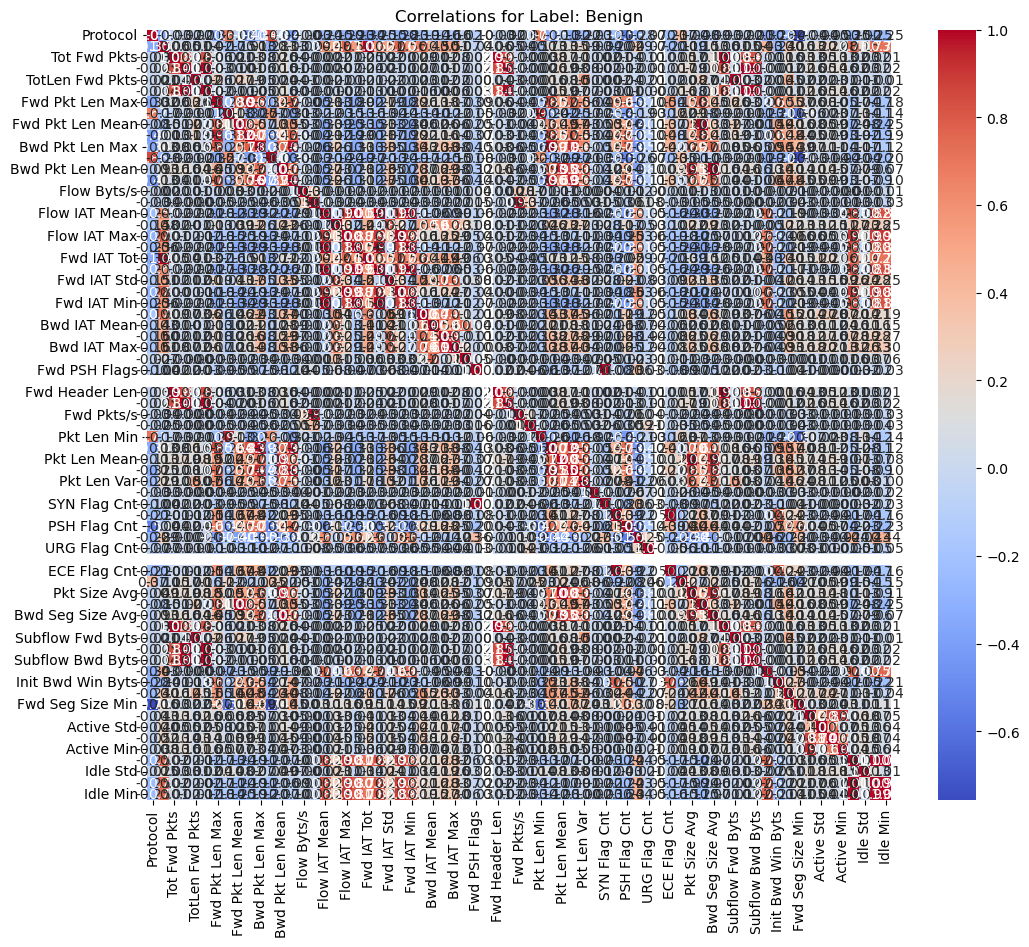

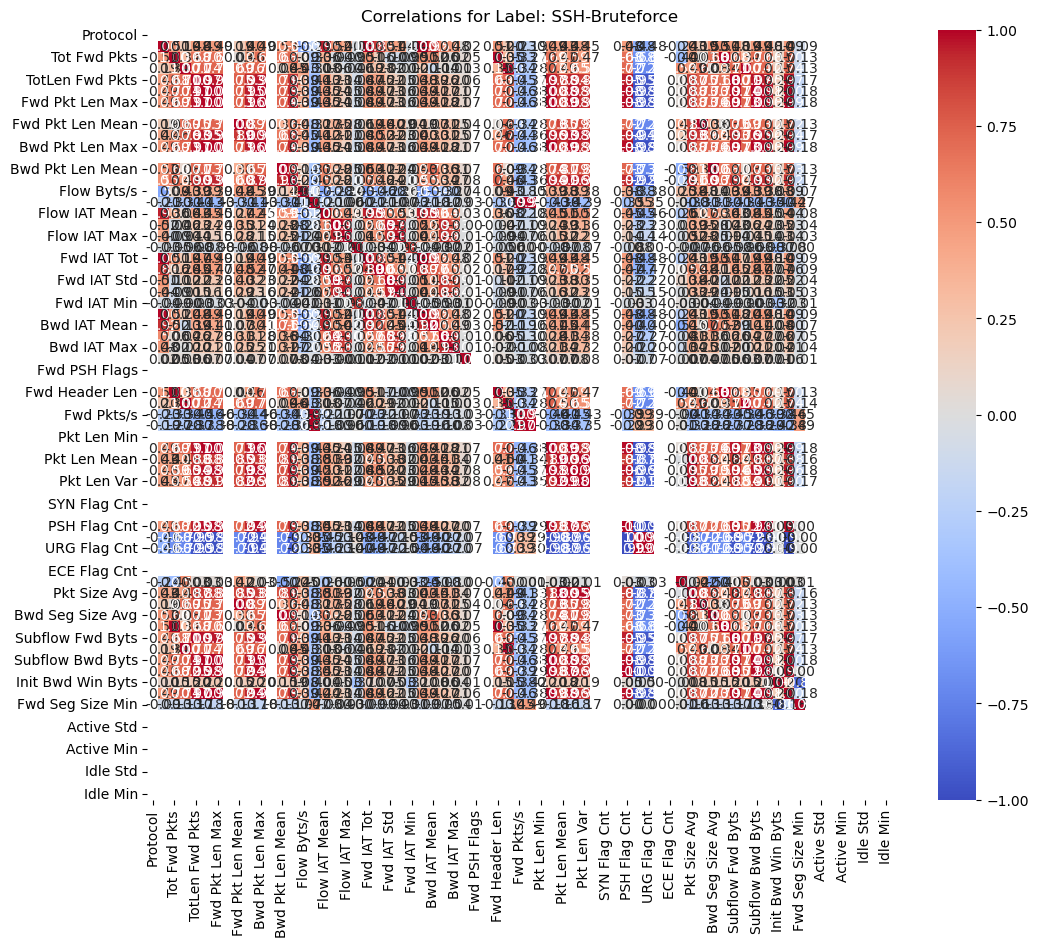

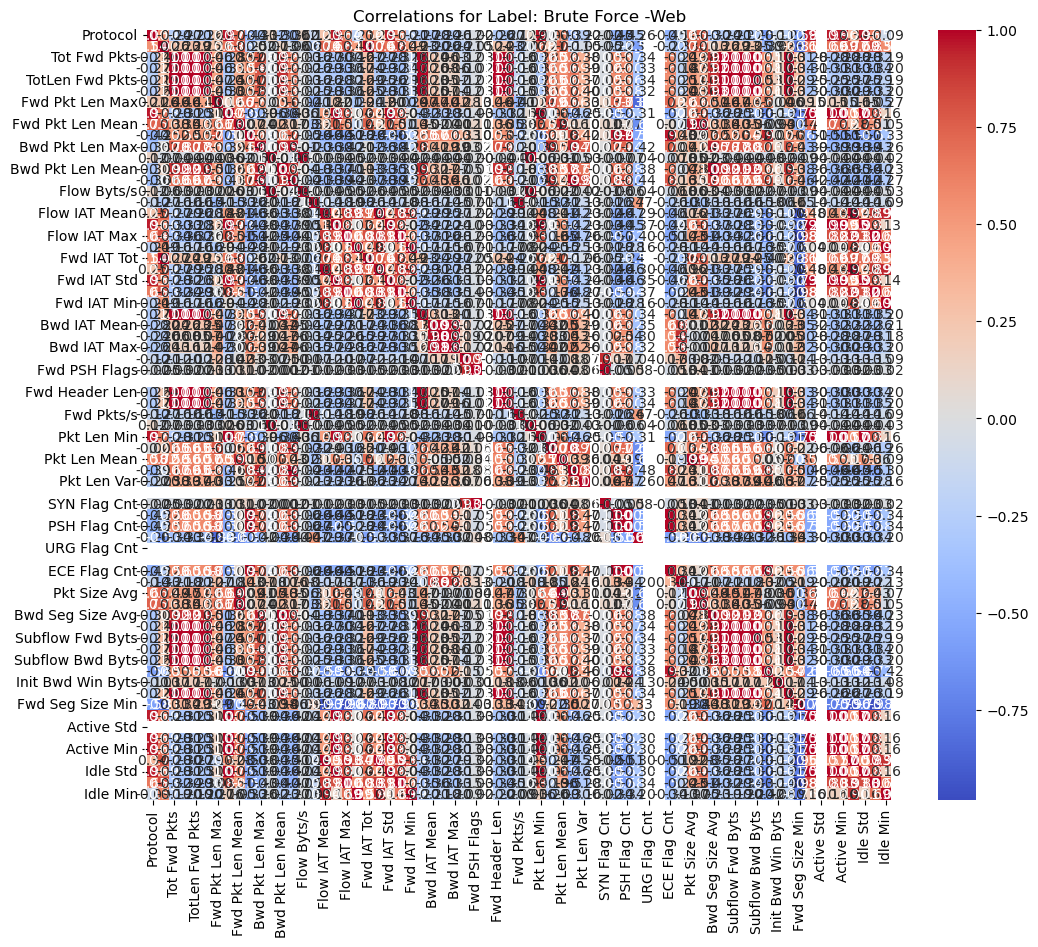

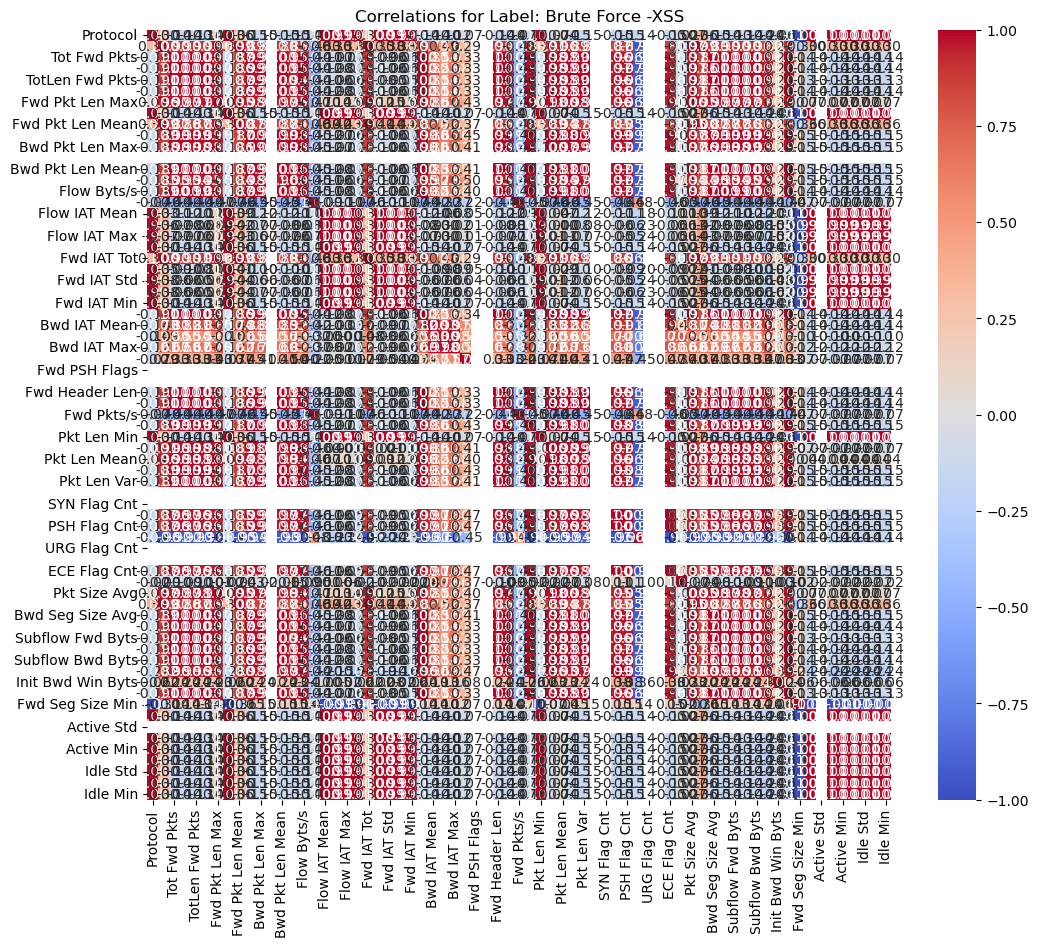

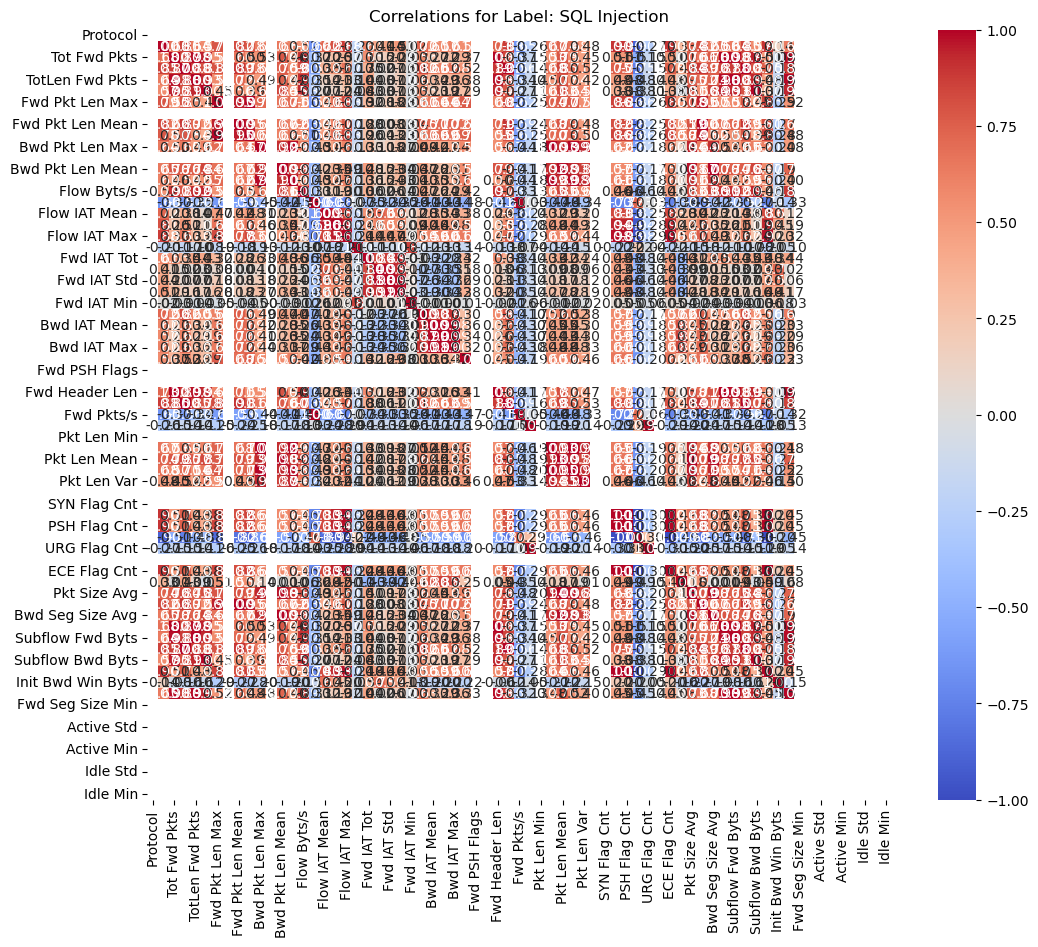

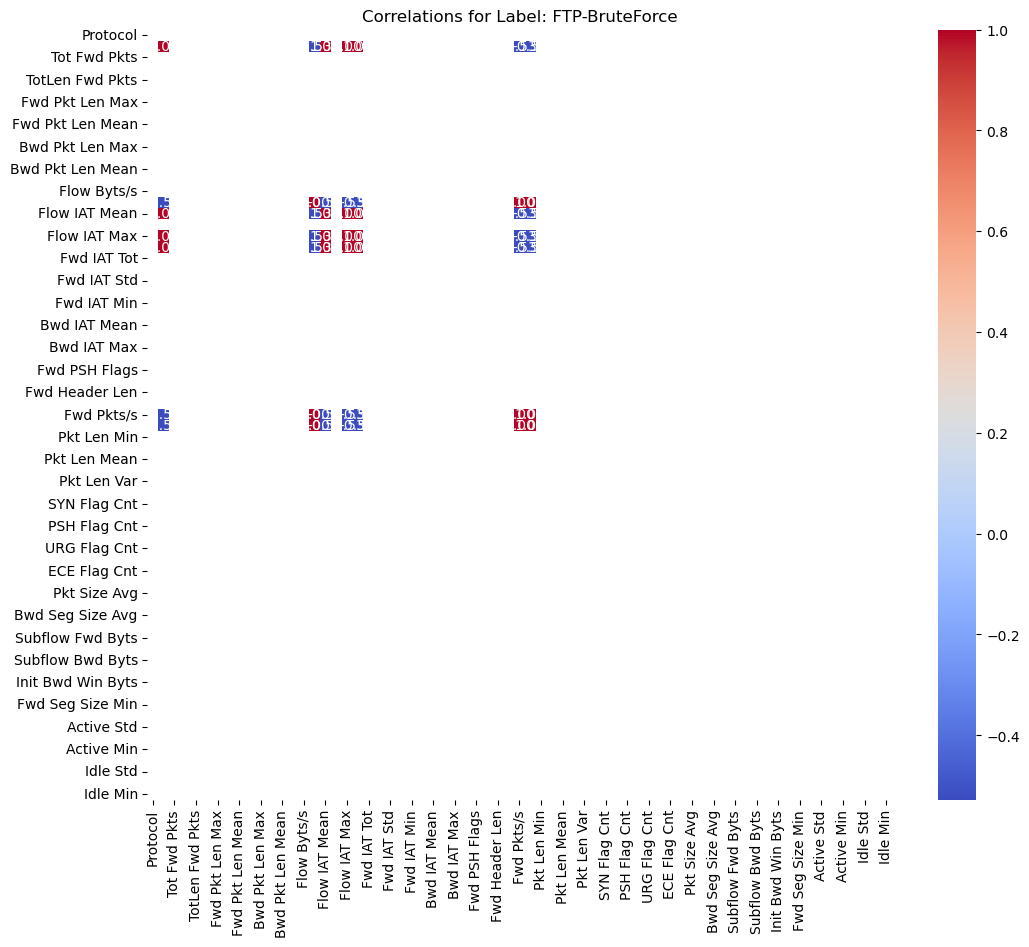

In [50]:
combined_data = pd.concat([X_train, Y_train], axis=1) # Create a DataFrame combining X_train and Y_train

unique_labels = Y_train['Label'].unique() # Get unique labels

correlations_by_label = {}  # Calculate correlations for each unique label

for label in unique_labels:
    label_data = combined_data[combined_data['Label'] == label]
    correlations = label_data[X_train.columns].corr()
    correlations_by_label[label] = correlations

for label, correlations in correlations_by_label.items(): # Visualize the correlations for each label
    plt.figure(figsize=(12, 10))
    plt.title(f"Correlations for Label: {label}")
    sb.heatmap(correlations, cmap='coolwarm', annot=True, fmt=".2f")
    plt.show()

* Feature Selection
* Data Sampling
> maybe data binarisation after feature selection